## Support Vector Machine (SVM)


In [1]:
# importing libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)


    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']

    return data_frame

In [4]:
# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
len(dataset)


300

In [ ]:
a=np.array([1,2,3,4,45])
a[-2:]

array([ 4, 45])

In [6]:
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
print(test_size)
# Split dataset into training and testing sets
x_train = features[:-test_size]

y_train = label[:-test_size].values


x_test = features[-test_size:].values
y_test = label[-test_size:].values

20


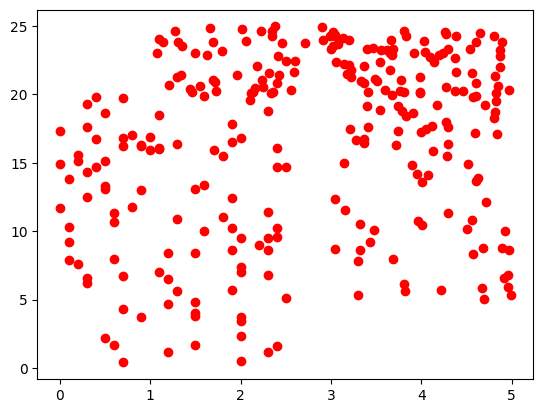

In [7]:
plt.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="r")

SVM with a second-degree polynomial kernel

In [12]:
model = svm.SVC(kernel='linear',degree=1) ## "Support Vector Classifier"
model.fit(x_train, y_train)



SVC(degree=1, kernel='linear')

In [13]:
# calculate the accuracy of this model against the testing set
predictions_poly = model.predict(x_test)


accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kerne|l\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kerne|l
Accuracy (normalized): 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
model.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.8

In [11]:
#get support vectors
print(model.support_vectors_)


# get indices of support vectors
print(model.support_)

# get number of support vectors for each class
print(model.n_support_)

[[ 2.3   9.5 ]
 [ 0.9  16.2 ]
 [ 0.9  16.3 ]
 [ 0.7  16.8 ]
 [ 2.   16.8 ]
 [ 2.3   8.6 ]
 [ 1.   16.9 ]
 [ 2.4   9.6 ]
 [ 1.9  17.8 ]
 [ 1.6  19.9 ]
 [ 2.1  19.6 ]
 [ 1.9  10.2 ]
 [ 1.8  11.  ]
 [ 1.7  15.9 ]
 [ 1.6  13.4 ]
 [ 1.5  13.1 ]
 [ 2.4  10.2 ]
 [ 1.3  10.9 ]
 [ 1.9  16.5 ]
 [ 0.8  17.  ]
 [ 0.5  18.6 ]
 [ 2.4  14.7 ]
 [ 2.3  11.4 ]
 [ 1.9  12.4 ]
 [ 2.    9.5 ]
 [ 1.3  16.4 ]
 [ 1.1  18.5 ]
 [ 1.8  15.5 ]
 [ 2.2   9.  ]
 [ 2.3  18.8 ]
 [ 1.1  16.1 ]
 [ 0.9  13.  ]
 [ 0.7  16.2 ]
 [ 0.4  19.8 ]
 [ 1.9   8.6 ]
 [ 1.6  10.  ]
 [ 2.4  16.1 ]
 [ 0.7  19.7 ]
 [ 2.5  14.7 ]
 [ 1.   15.9 ]
 [ 1.1  16.  ]
 [ 3.04 12.32]
 [ 1.3  21.28]
 [ 4.68  8.8 ]
 [ 3.48 10.1 ]
 [ 1.73 20.26]
 [ 4.69  5.04]
 [ 4.97  8.6 ]
 [ 3.32  8.65]
 [ 1.31 23.82]
 [ 4.96  6.76]
 [ 3.05  8.68]
 [ 3.16 11.55]
 [ 4.89  8.76]
 [ 1.21 20.69]
 [ 3.96 10.75]
 [ 4.51 10.19]
 [ 3.43  9.24]
 [ 3.69  8.  ]
 [ 4.57  8.34]
 [ 1.46 20.18]
 [ 4.3  11.34]
 [ 1.44 20.4 ]
 [ 4.22  5.67]
 [ 4.96  5.95]
 [ 1.14 23.83]
 [ 4.99  5

In [ ]:
# let's see if a more simplistic approach could have solved our problem by fitting an SVM with a linear kernel